In [1]:
# imports
import pandas as pd # for using pandas data frames
import numpy as np # for converting numpy array to data frame

In [2]:
# imports for graphs and plotting
#get_ipython().system('pip install ggplot')
#get_ipython().system('pip install plotnine')

In [3]:
from plotnine import ggplot, aes, geom_line

#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10

In [4]:

# reading from csv data file as pandas data frame
df = pd.read_csv(r'suicide-homicide-gdp.csv')

# checking the data (rows 1-10)
print(df[1:10])

       country iso3c iso2c  year  Intentional homicides (per 100,000 people)  \
1  Afghanistan   AFG    AF  1971                                         NaN   
2  Afghanistan   AFG    AF  1972                                         NaN   
3  Afghanistan   AFG    AF  1973                                         NaN   
4  Afghanistan   AFG    AF  1974                                         NaN   
5  Afghanistan   AFG    AF  1975                                         NaN   
6  Afghanistan   AFG    AF  1976                                         NaN   
7  Afghanistan   AFG    AF  1977                                         NaN   
8  Afghanistan   AFG    AF  1978                                         NaN   
9  Afghanistan   AFG    AF  1979                                         NaN   

   Suicide mortality rate (per 100,000 population)  GDP (current US$)  \
1                                              NaN       1.831109e+09   
2                                              NaN   

In [5]:
# creating a data frame from raw data with headings
data_frame = pd.DataFrame(np.array(df), columns = ['country', 'iso3c', 'iso2c', 'year', 'Intentional homicides (per 100,000 people)', 'Suicide mortality rate (per 100,000 population)', 'GDP (current US$)', 'GDP per capita, PPP (current international $)', 'adminregion', 'incomeLevel'])
data_frame.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1748886596.0,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1831108971.0,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1595555476.0,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1733333264.0,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2155555498.0,NaN,South Asia,Low income


In [6]:
# removing blank rows from data frame, setting threshold of 1 - anything with 1 NaN will be removed
newdf = data_frame = data_frame.dropna(thresh=10)

newdf.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
39,Afghanistan,AFG,AF,2009,3.926774,4.4,12416161049.0,1519.692923,South Asia,Low income
40,Afghanistan,AFG,AF,2010,3.36811,4.3,15856678596.0,1710.575411,South Asia,Low income
41,Afghanistan,AFG,AF,2011,4.087337,4.1,17805113119.0,1699.48811,South Asia,Low income
42,Afghanistan,AFG,AF,2012,6.251328,4.0,19907317066.0,1914.774228,South Asia,Low income
45,Afghanistan,AFG,AF,2015,9.783922,4.0,19134211764.0,2087.305323,South Asia,Low income


In [7]:
# checking the size of the data set
newdf.shape

(1487, 10)

In [8]:
# saving to new csv
newdf.to_csv('cleaned_data02.csv')

 We have now cut our data from 13,000+ rows down to 1,411 after removing any rows which were mostly blank (NaN) rows. Our reasoning for this was due to missing values would cause issues when implementing any machine learning modules.
 
Data Exploration
 We now want to create some graphs to help visualize the current data

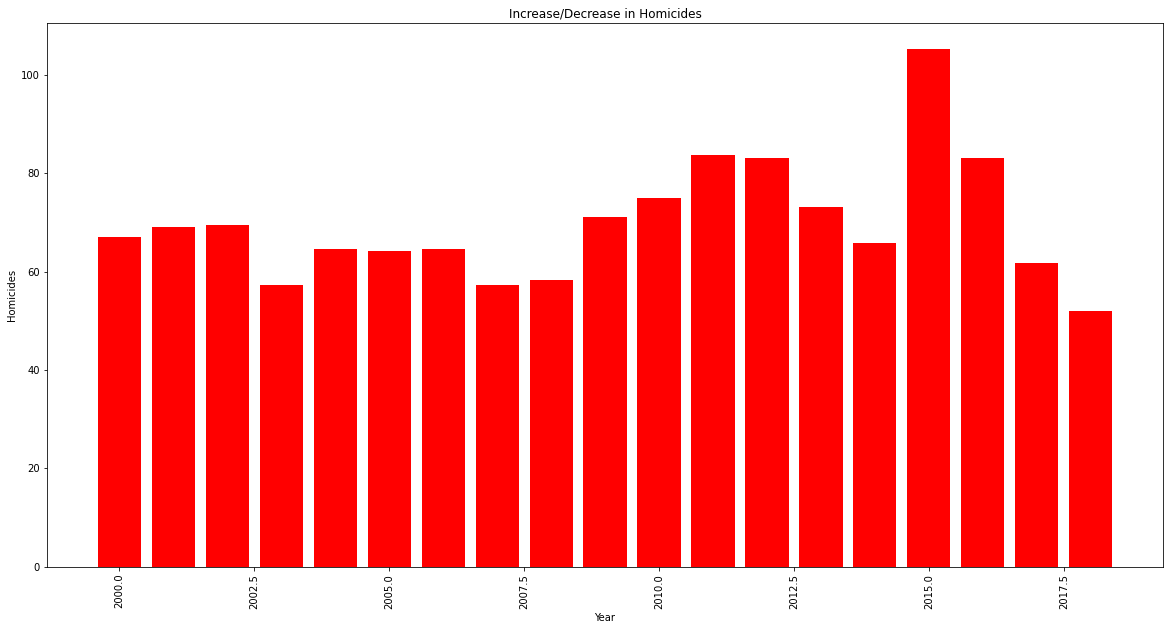

In [9]:
year = newdf['year']
homicides = newdf['Intentional homicides (per 100,000 people)']

plt.bar(year, homicides, color="red")

plt.xlabel('Year')

plt.ylabel('Homicides')

plt.title('Increase/Decrease in Homicides')

plt.xticks(rotation=90)

plt.show()

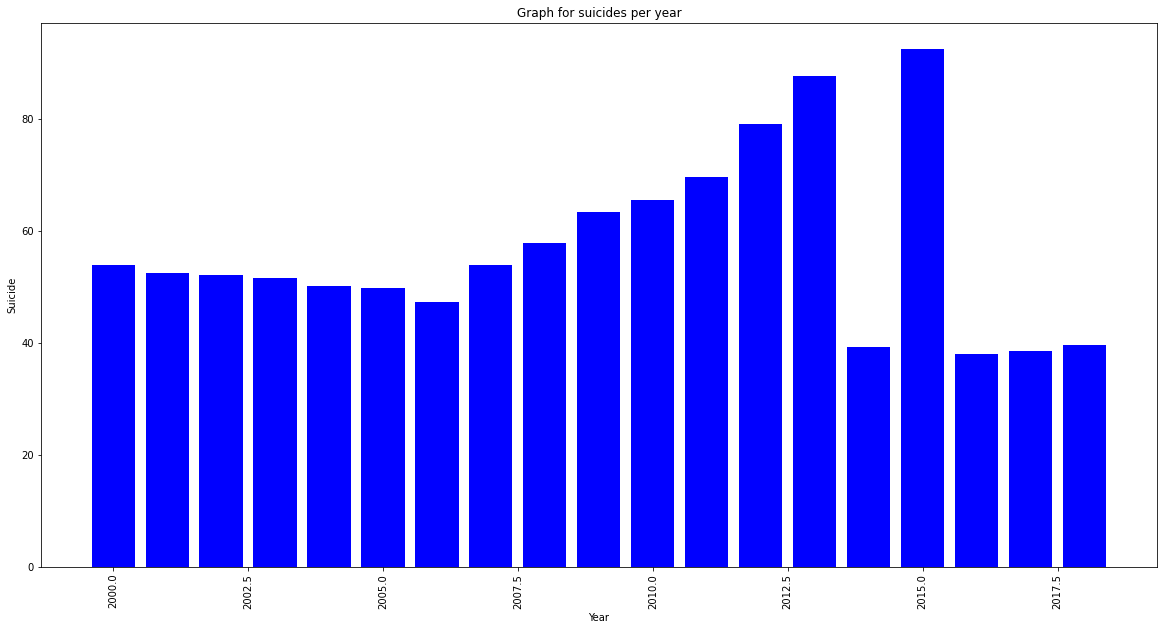

In [10]:
year = newdf['year']
Suicide = newdf['Suicide mortality rate (per 100,000 population)']

plt.bar(year, Suicide, color="blue")

plt.xlabel('Year')

plt.ylabel('Suicide')

plt.title('Graph for suicides per year')

plt.xticks(rotation=90)

plt.show()

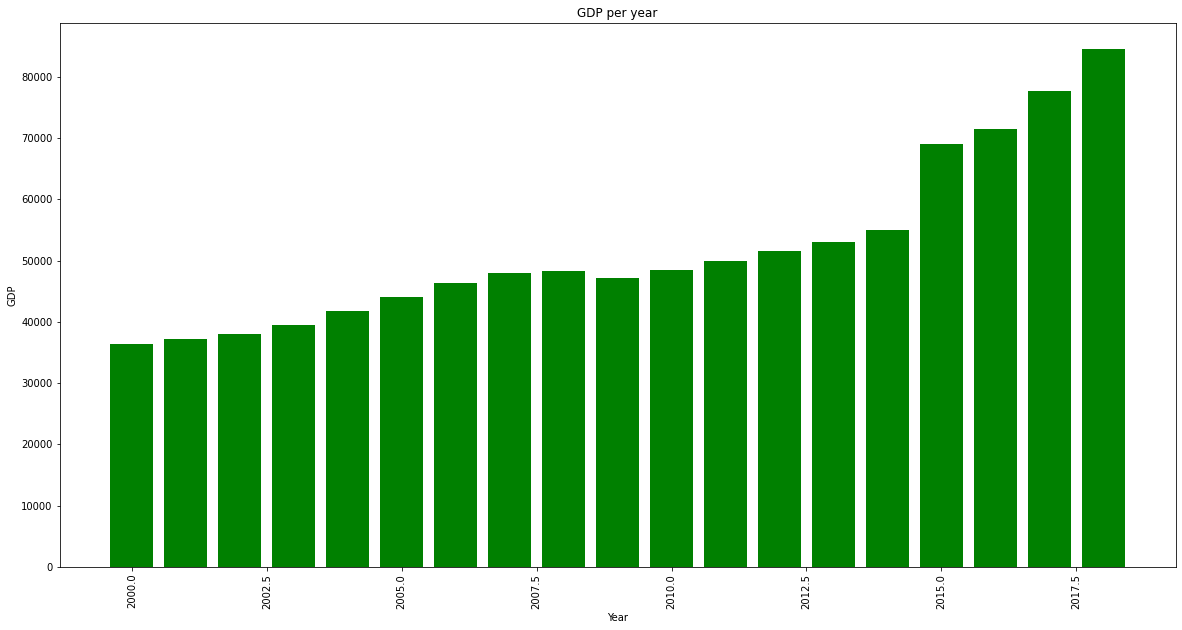

In [11]:
year = newdf['year']
GDP = newdf['GDP per capita, PPP (current international $)']

plt.bar(year, GDP, color="green")

plt.xlabel('Year')

plt.ylabel('GDP')

plt.title('GDP per year')

plt.xticks(rotation=90)

plt.show()

Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

AttributeError: 'DataFrame' object has no attribute 'fee'

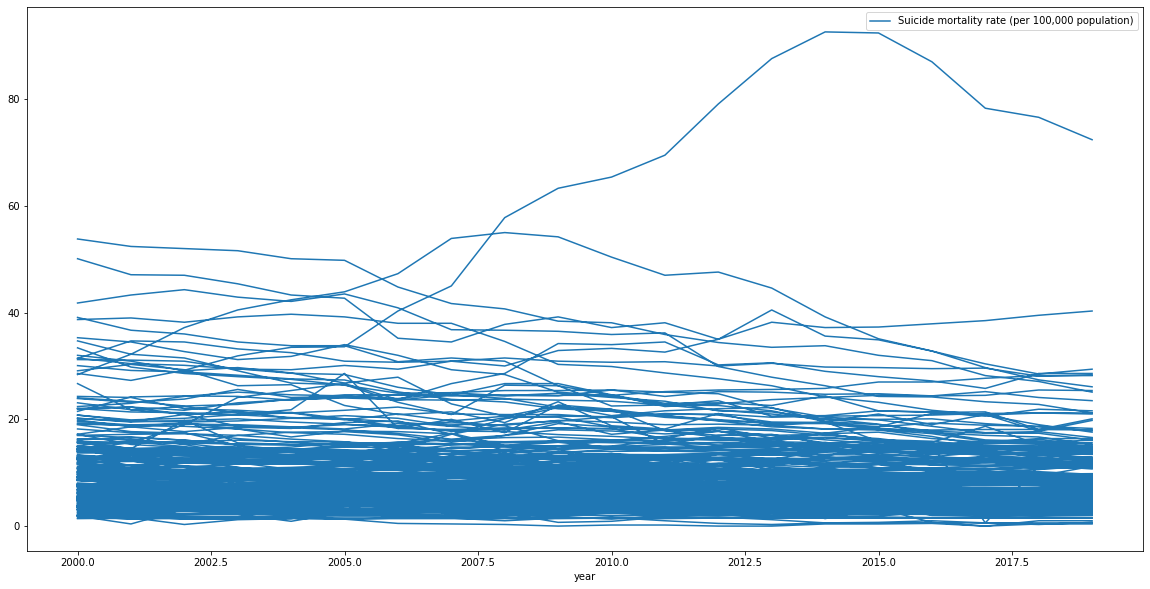

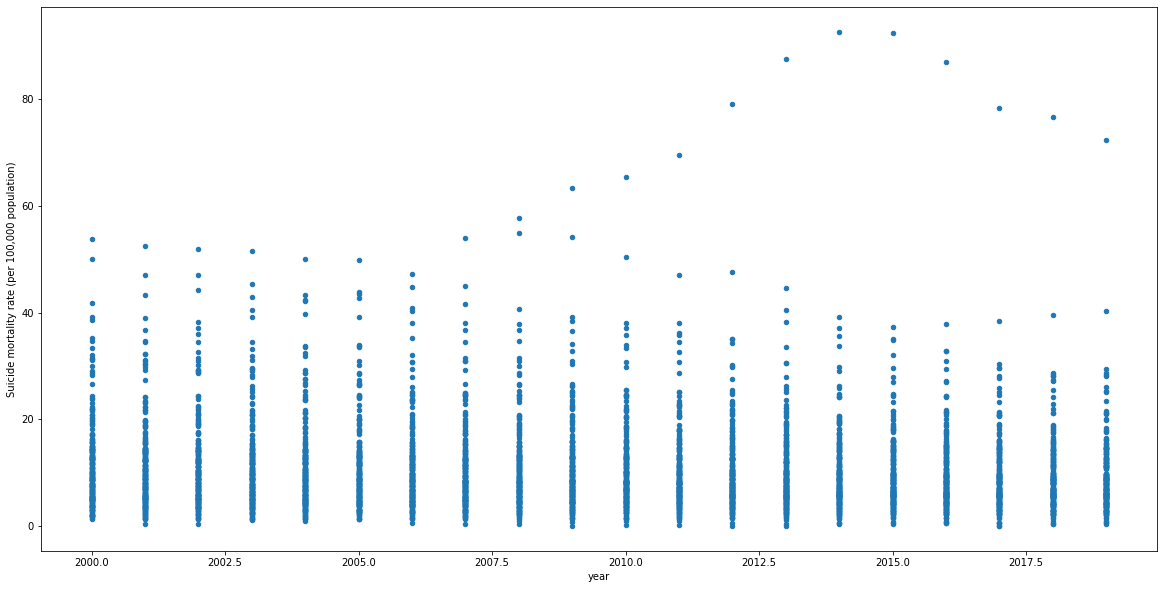

In [35]:
regression = pd.read_csv('suicide-homicide-gdp.csv')
regression.shape
regression.head(10)
regression.plot('year', 'Suicide mortality rate (per 100,000 population)')
regression.plot.scatter('year', 'Suicide mortality rate (per 100,000 population)')
x_train, x_test, y_train, y_test = train_test_split(regression.year, regression.fee, test_size = 0.2)
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()
plt.hist(residuals)
mean_squared_error(y_test,preds)**0.5




C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function

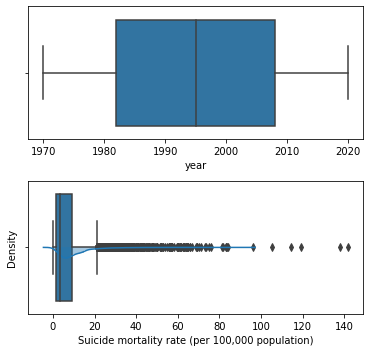

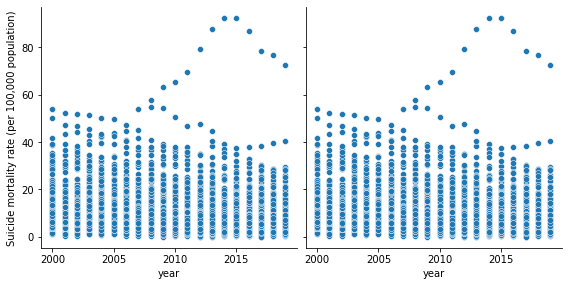

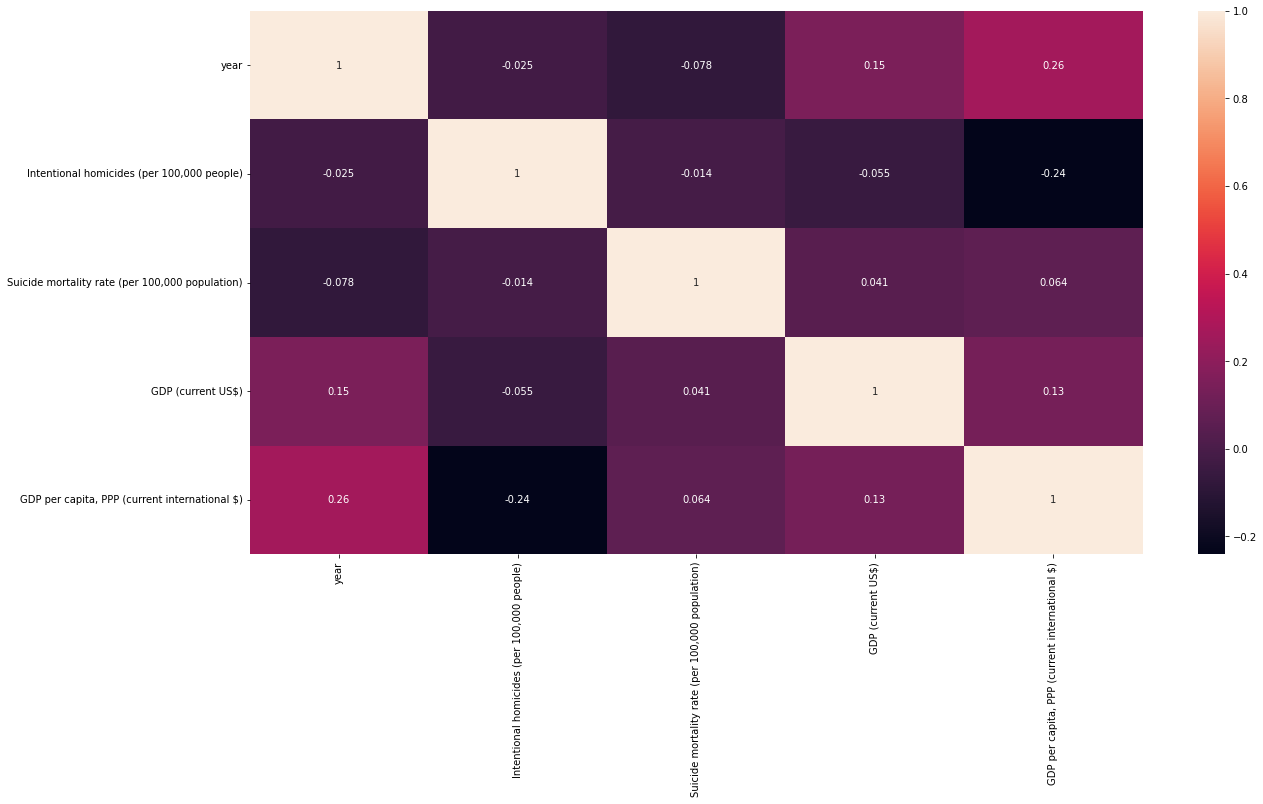

In [37]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




#Reading the dataset

dataset = pd.read_csv("suicide-homicide-gdp.csv")
dataset.head()
dataset.shape
dataset.isna().sum()
dataset.duplicated().any()
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(dataset['year'], ax = axs[0])
plt2 = sns.boxplot(dataset['Intentional homicides (per 100,000 people)'], ax = axs[1])
plt.tight_layout()
sns.distplot(dataset['Suicide mortality rate (per 100,000 population)']);
sns.pairplot(dataset, x_vars=['year', 'year'], y_vars='Suicide mortality rate (per 100,000 population)', height=4, aspect=1, kind='scatter')
plt.show()
sns.heatmap(dataset.corr(), annot = True)

plt.show()